In [2]:
## Importing required Libraries
import os
import tensorflow as tf
from tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb

In [3]:
## Get working directory
PATH = os.getcwd()
## Path to save the embedding and checkpoints generated
LOG_DIR = PATH + '/project-tensorboard/log-1/'

In [4]:
PATH

'/home/sohini/ML_examples'

In [5]:
LOG_DIR

'/home/sohini/ML_examples/project-tensorboard/log-1/'

In [1]:
df = pd.read_csv("Journey_Clusters_5.csv")

np.shape(df)

NameError: name 'pd' is not defined

In [6]:
#df=df.drop(columns=['clusterID'])
df=df.drop(df.columns[0], axis=1)
df.head()

,user_id,product_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Purchase,clusterID
0,586731299,5802440,2,2,22192.0,2.16,2.16,1,0,0,...,1,1,0,0,0,0,0,0,1,1
1,569852676,4938,2,1,499.0,1.43,1.43,1,0,0,...,0,0,0,0,1,0,0,0,1,1
2,448826103,5814048,3,2,7226454.0,6.27,5.95,2,0,0,...,0,0,0,0,0,0,0,1,1,3
3,448826103,5814047,2,1,1381.0,6.27,6.27,1,0,0,...,0,0,0,0,0,0,0,1,1,1
4,448826103,5787041,5,1,374.0,9.52,9.52,4,0,0,...,0,0,0,0,0,0,0,1,1,1


In [7]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,user_id,product_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Purchase,clusterID
5869692,441840150,5926573,1,1,0.0,6.02,6.02,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1423622,573743031,5747146,1,1,0.0,3.00,3.00,1,0,0,...,0,1,0,0,0,0,0,0,0,1
8153767,545610283,5726189,3,1,955.0,3.00,3.00,1,0,2,...,0,0,0,1,0,0,0,0,0,1
9446830,513017343,5809911,1,1,0.0,4.71,4.71,0,1,0,...,0,0,0,0,0,1,0,0,0,1
7556301,399171952,5830632,2,2,7230.0,15.41,15.41,0,2,0,...,0,0,0,0,0,1,0,0,0,1


In [8]:
df_new=df.iloc[0:25,:]
print(df_new.shape)
df_new.head()

(25, 37)


,user_id,product_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Purchase,clusterID
5869692,441840150,5926573,1,1,0.0,6.02,6.02,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1423622,573743031,5747146,1,1,0.0,3.00,3.00,1,0,0,...,0,1,0,0,0,0,0,0,0,1
8153767,545610283,5726189,3,1,955.0,3.00,3.00,1,0,2,...,0,0,0,1,0,0,0,0,0,1
9446830,513017343,5809911,1,1,0.0,4.71,4.71,0,1,0,...,0,0,0,0,0,1,0,0,0,1
7556301,399171952,5830632,2,2,7230.0,15.41,15.41,0,2,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
X_train=df_new.iloc[0:250000,:]
X_train.to_csv('Cosmetics_subsample_2019.csv', index=False)

In [1]:
import matplotlib.pyplot as plt
YY=df.loc[:,'clusterID']
plt.hist(y)

NameError: name 'df' is not defined

In [9]:
#version 1
def register_embedding(embedding_tensor_name, meta_data_fname, log_dir):
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_tensor_name
    embedding.metadata_path = meta_data_fname
    projector.visualize_embeddings(log_dir, config)

def save_labels_tsv(labels, filepath, log_dir):
    with open(os.path.join(log_dir, filepath), 'w') as f:
        for label in labels:
            f.write('{}\n'.format(label))


In [29]:
#version 2
def register_embedding(embedding_tensor_name, meta_data_fname, log_dir):
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_tensor_name
    embedding.metadata_path = meta_data_fname
    projector.visualize_embeddings(log_dir, config)

def save_labels_tsv(df, filepath, log_dir):
    with open(os.path.join(log_dir, filepath), 'w') as f:
        for index, row in df.iterrows():
            f.write('%s\n' %(row['model']))


In [22]:
META_DATA_FNAME = 'meta_cosm_reduction1.tsv'  # Labels will be stored here
EMBEDDINGS_TENSOR_NAME = 'sample_data_cosm_reduction1'
EMBEDDINGS_FPATH = os.path.join(LOG_DIR, EMBEDDINGS_TENSOR_NAME + '.ckpt')
STEP = 0

register_embedding(EMBEDDINGS_TENSOR_NAME, META_DATA_FNAME, LOG_DIR)
save_labels_tsv(y, META_DATA_FNAME, LOG_DIR)#version 1
#save_labels_tsv(df, META_DATA_FNAME, LOG_DIR)#version 2

In [23]:
tf.compat.v1.disable_eager_execution()
tensor_embeddings = tf.Variable(X, name=EMBEDDINGS_TENSOR_NAME)
sess = tf.compat.v1.InteractiveSession()
sess.run(tf.compat.v1.global_variables_initializer())
saver = tf.compat.v1.train.Saver()
saver.save(sess, EMBEDDINGS_FPATH, STEP)
sess.close()

In [12]:
# Next, to analyze composition of each cluster

In [13]:
column_values = df["clusterID"]. values. ravel()
unique_values_a = np.array(pd.unique(column_values))
unique_values=np.sort(unique_values_a)
print(unique_values)


[0 1 2 3 4]


In [14]:
purchase_percentage=np.zeros(np.shape(unique_values))
representation_percentage=np.zeros(np.shape(unique_values))
for index, item in enumerate(unique_values):
    locations=df.loc[df['clusterID'] == item]
    purchase=locations.loc[locations['Purchase']==1]
    print(locations.shape[0])
    representation_percentage[index]=round((locations.shape[0]/df.shape[0])*100,2)
    purchase_percentage[index]=round((purchase.shape[0]/locations.shape[0])*100,2)
    
    

222715
9261877
62673
118332
490603


[ 2.19 91.19  0.62  1.17  4.83]
[19.45 11.14 32.91 22.84 21.01]


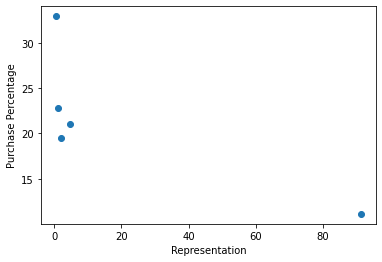

In [15]:
print((representation_percentage))
print(purchase_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [16]:
print(np.sum(purchase_percentage))

107.35000000000001


In [17]:
total_purchase=df.loc[df['Purchase']==1]

In [18]:
purchase_distrib=total_purchase.shape[0]/df.shape[0]
print(purchase_distrib*100)

12.06919910990331


In [19]:
#Use seaborn to print distributions for each cluster
df_new=df.drop(columns=['Unnamed: 0', 'user_id','product_id'])
df_new.head()
print(df_new.iloc[0:1])
print(df_new.columns.values[0:33])

         NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  \
9407819                     1            1              0.0      7.14   

         minPrice  NumCart  NumView  NumRemove  InsessionCart  InsessionView  \
9407819      7.14        0        1          0              0              5   

         ...  Dec  Afternoon  Dawn  EarlyMorning  Evening  Morning  Night  \
9407819  ...    0          0     0             0        0        0      1   

         Noon  Purchase  clusterID  
9407819     0         0          1  

[1 rows x 35 columns]
['NumOfEventsInJourney' 'NumSessions' 'interactionTime' 'maxPrice'
 'minPrice' 'NumCart' 'NumView' 'NumRemove' 'InsessionCart'
 'InsessionView' 'InsessionRemove' 'Weekend' 'Fr' 'Mon' 'Sat' 'Sun' 'Thu'
 'Tue' 'Wed' '2019' '2020' 'Jan' 'Feb' 'Oct' 'Nov' 'Dec' 'Afternoon'
 'Dawn' 'EarlyMorning' 'Evening' 'Morning' 'Night' 'Noon']


In [20]:
#subsample each cluster to 10% as df_sub and then analyz
data=[]
df_sub = pd.DataFrame(data, columns=(df_new.columns.values[0:34]))

for index, item in enumerate(unique_values):
    locations=df_new.loc[df_new['clusterID'] == item]
    ret_size=np.round(0.1*locations.shape[0]).astype(int)
    print(ret_size)
    rows=np.random.permutation(ret_size)
    loc_data=locations.iloc[rows,:]
    #print(loc_data.iloc[0:5,0:34])
    df_sub=df_sub.append(loc_data)
print(df_sub.shape[0])

22272
926188
6267
11833
49060
1015620


/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


ValueError: num must be 1 <= num <= 28, not 29

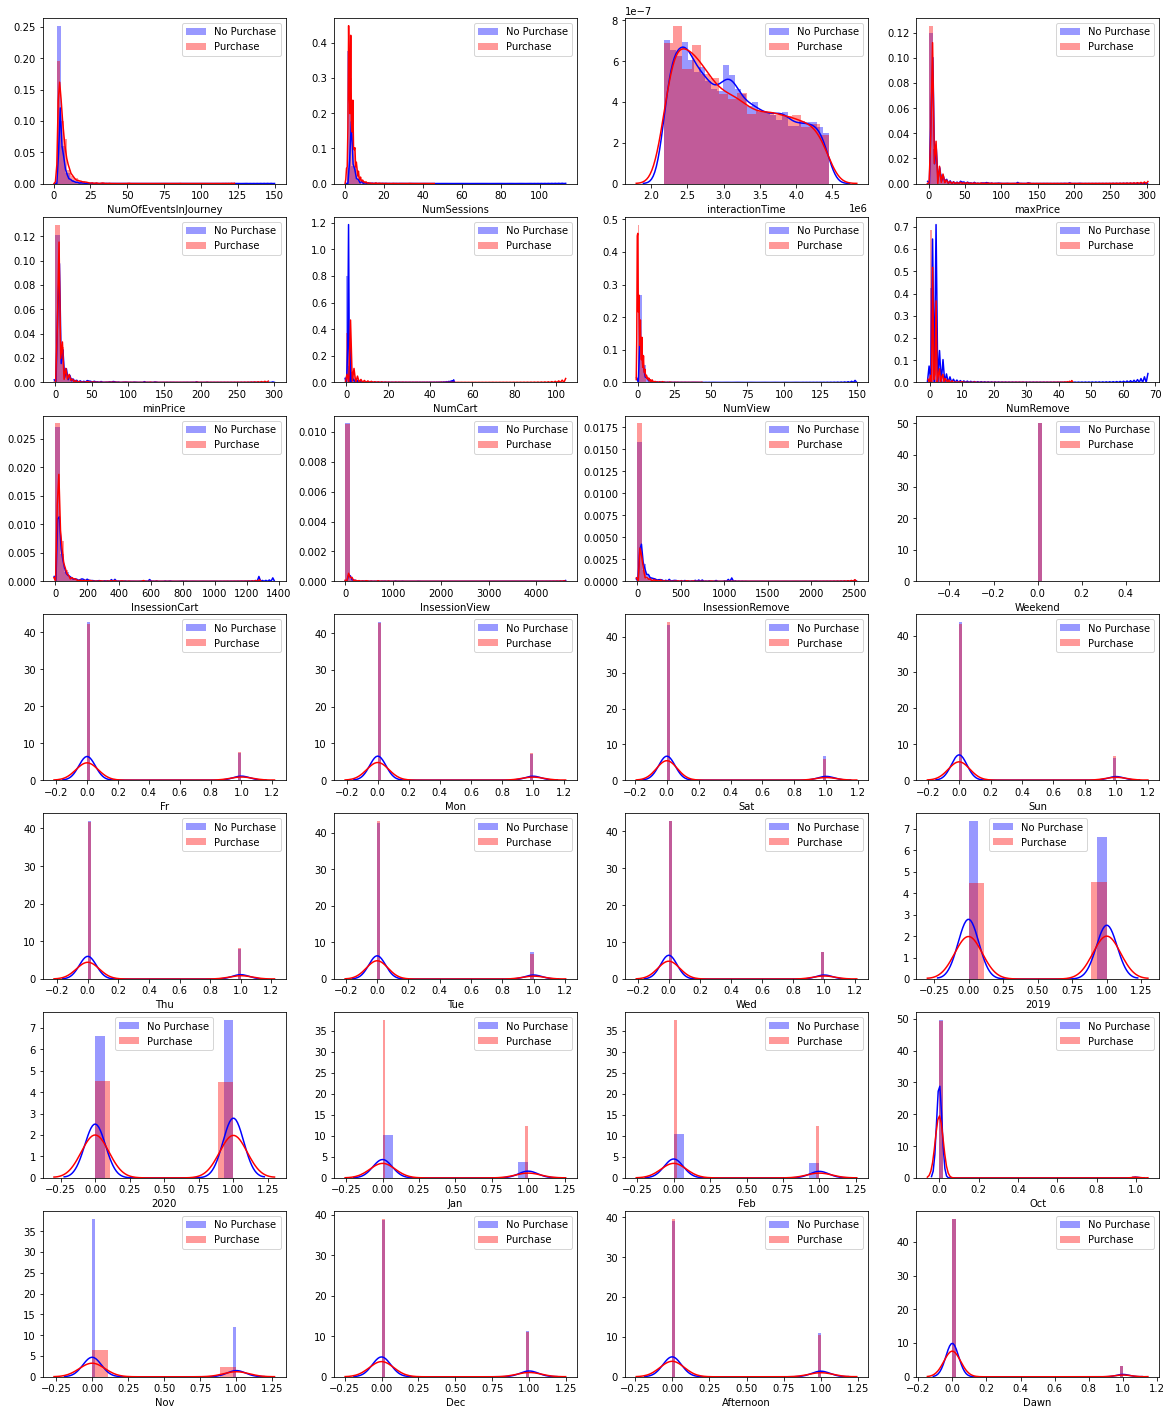

In [21]:
#Cluster 0-16
result = df_sub.loc[df_sub['clusterID'] == 0]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(7, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density

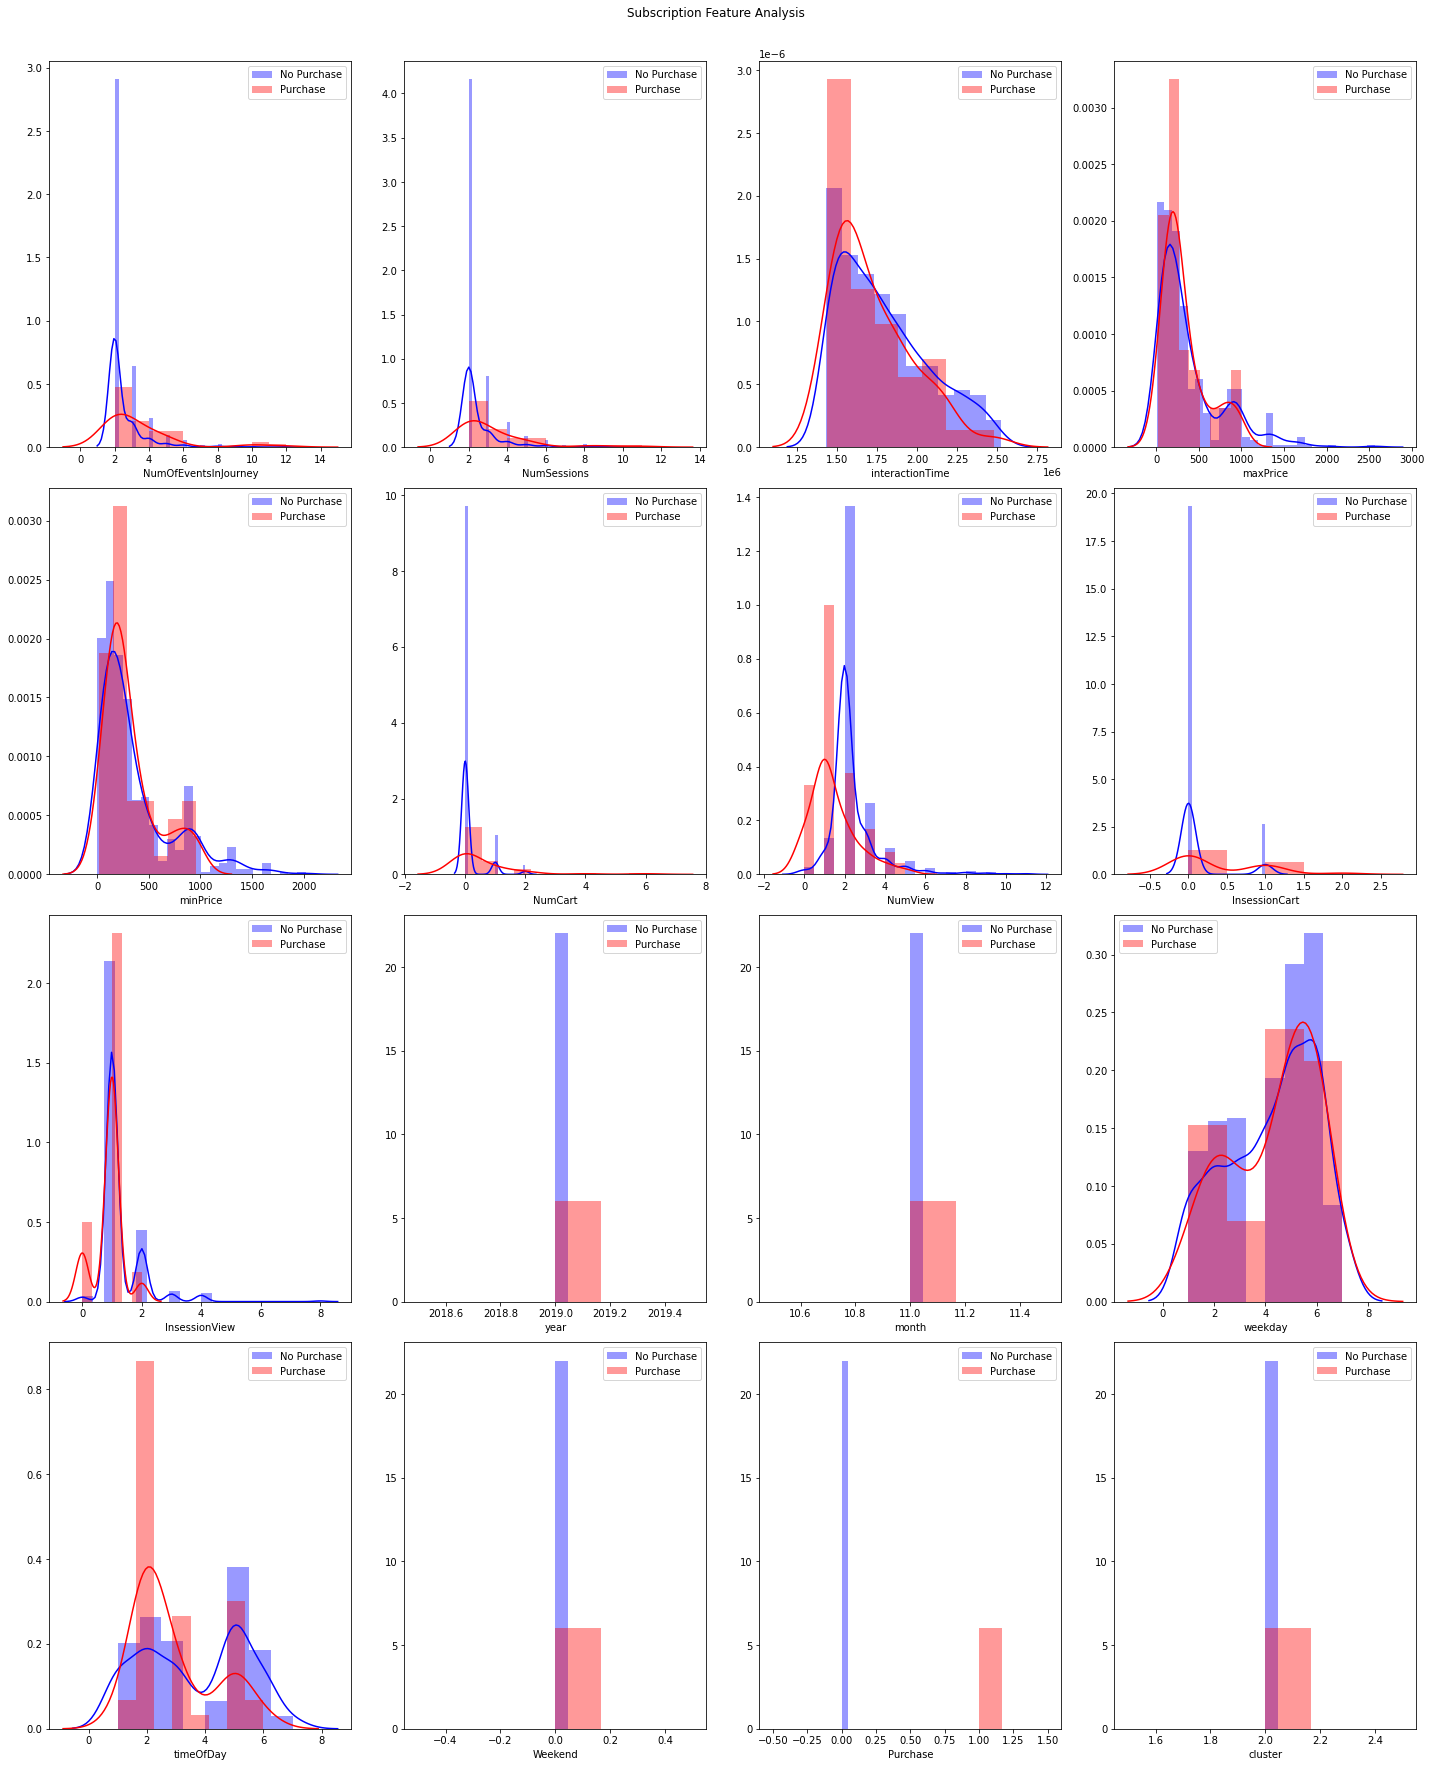

In [27]:
#Cluster 2
result = df.loc[df['cluster'] == 2]


fig = plt.figure(figsize = (20, 25))
j = 0
for i in result.columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sb.distplot(result[i][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[i][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density

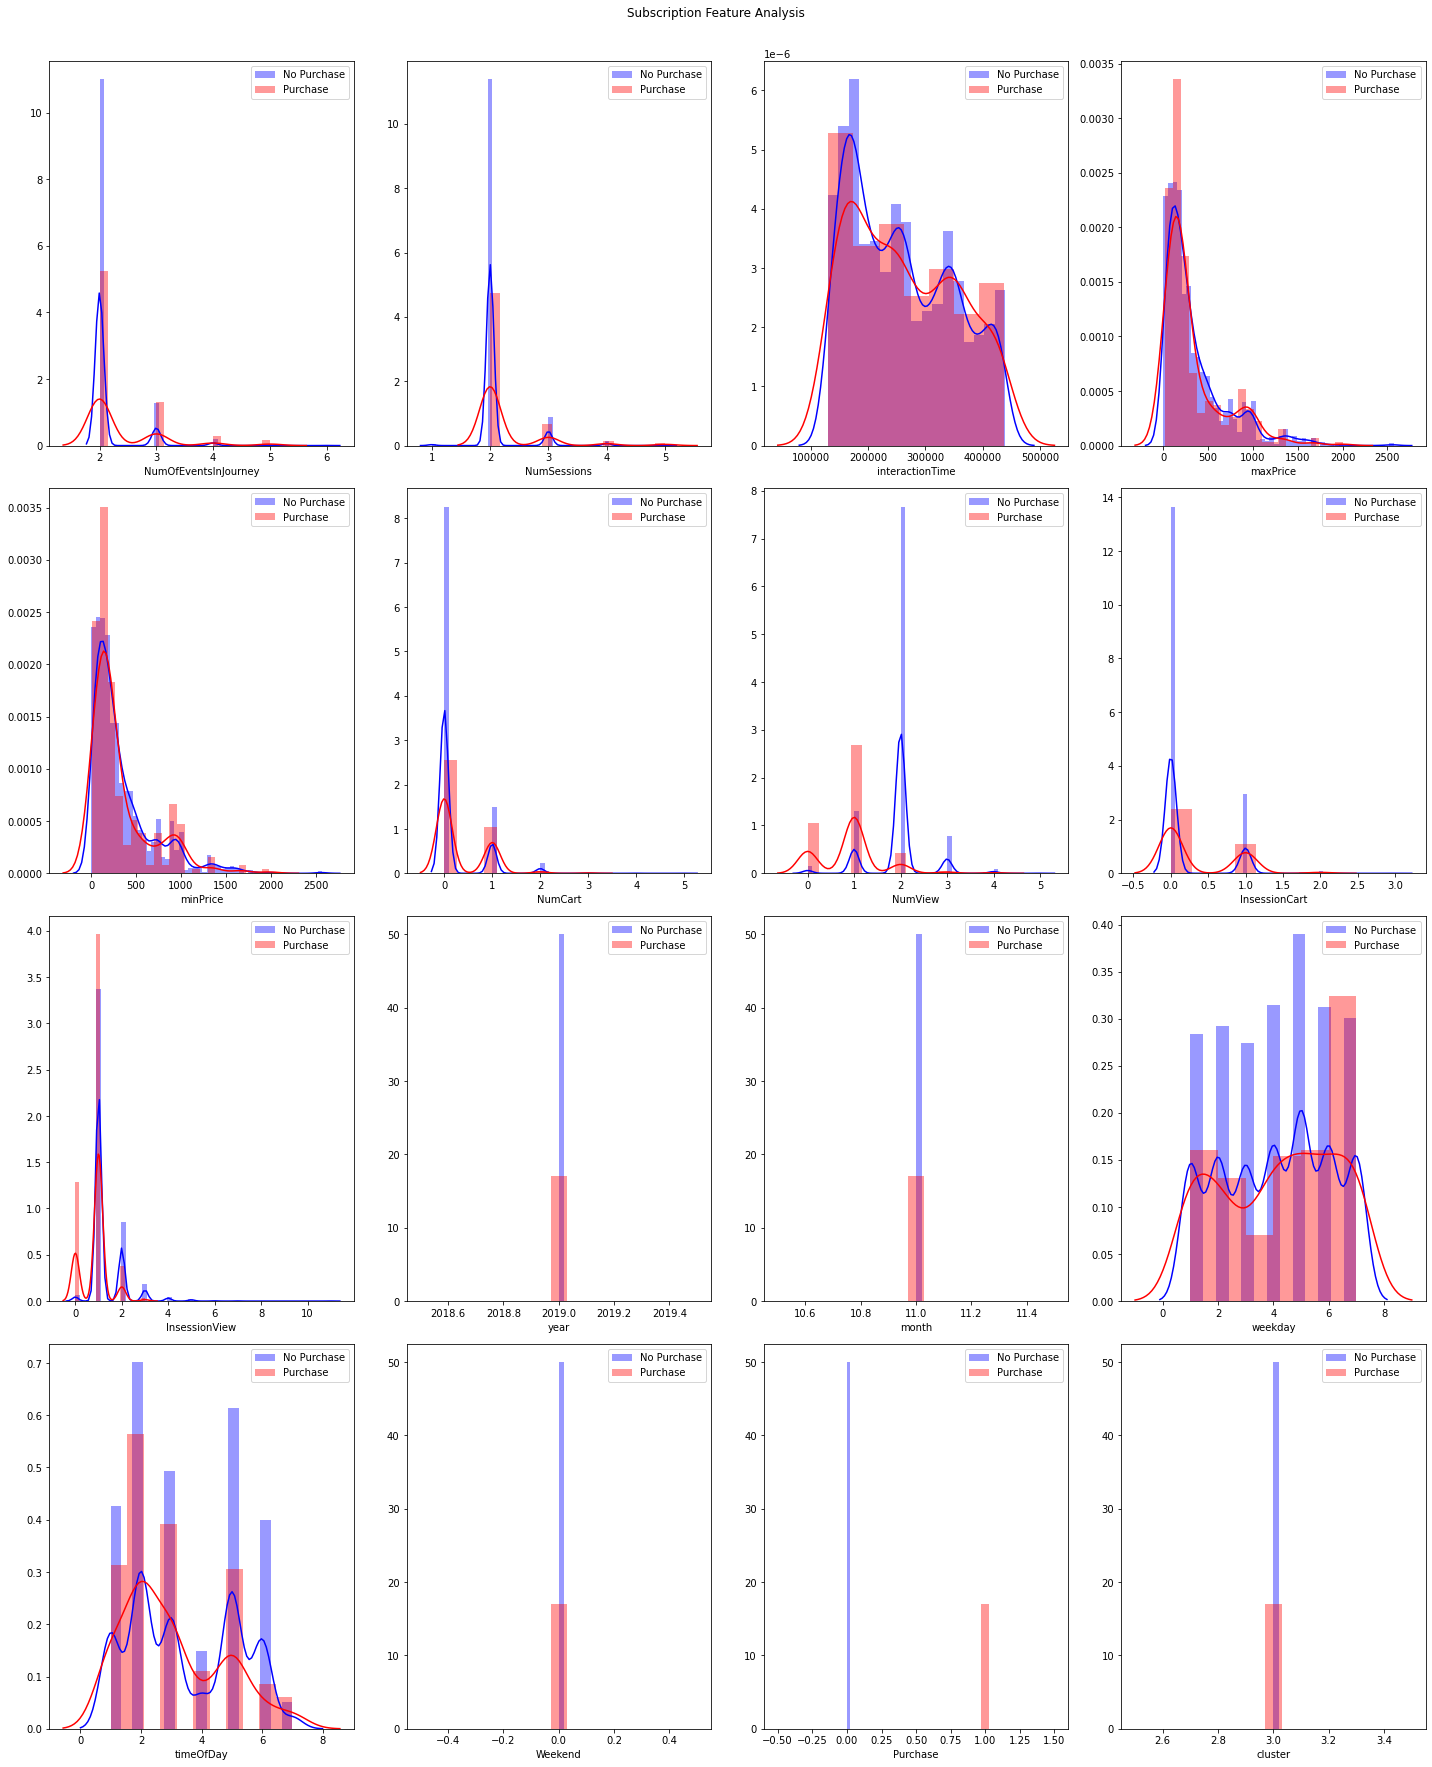

In [28]:
#Cluster 3
result = df.loc[df['cluster'] == 3]


fig = plt.figure(figsize = (20, 25))
j = 0
for i in result.columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sb.distplot(result[i][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[i][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density

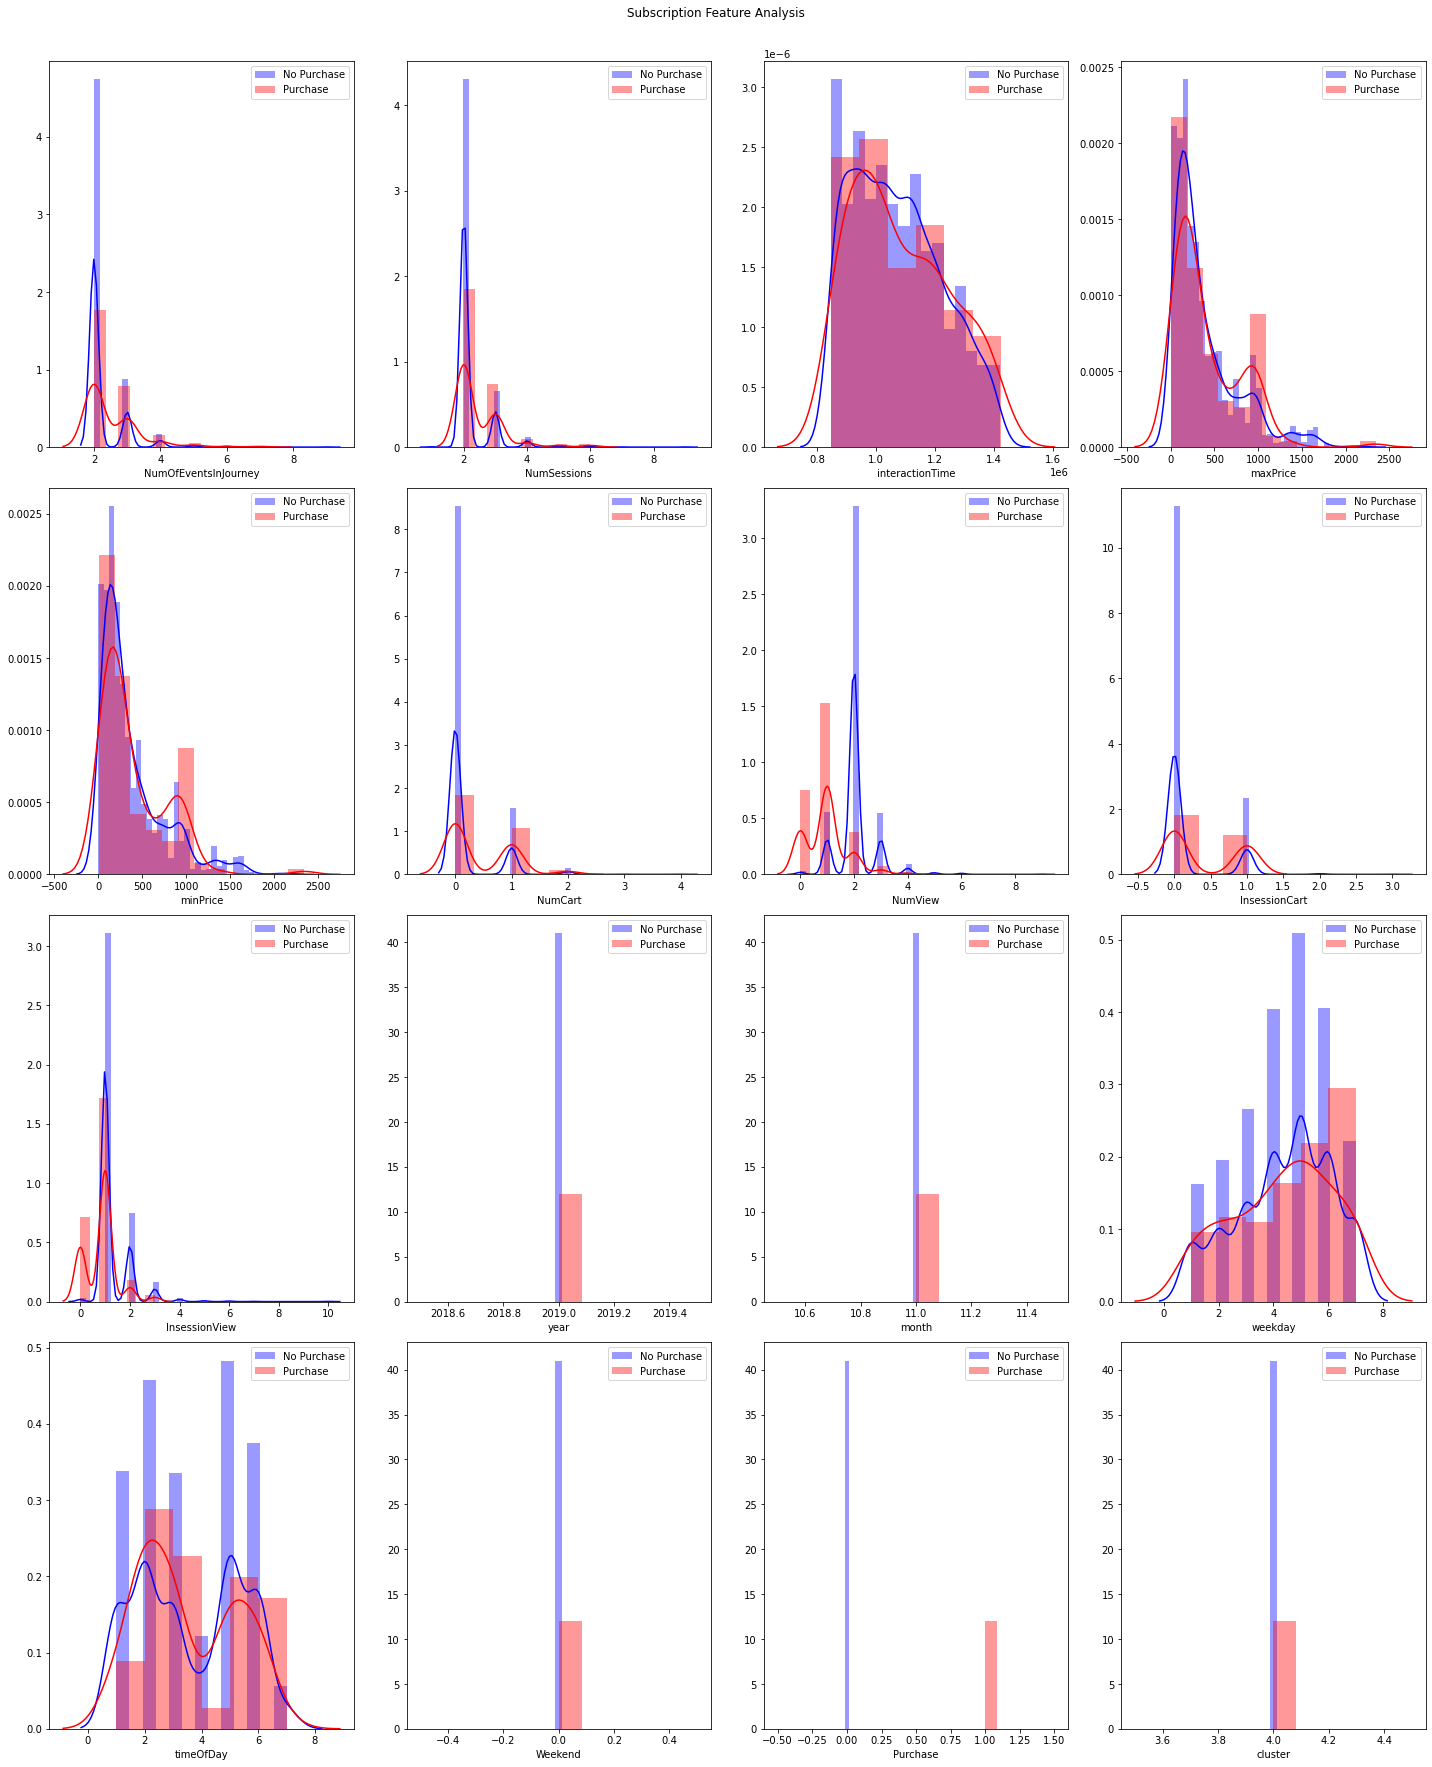

In [29]:
#Cluster 4
result = df.loc[df['cluster'] == 4]


fig = plt.figure(figsize = (20, 25))
j = 0
for i in result.columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sb.distplot(result[i][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[i][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [1]:
# Now to find mean(std dev)  values for purchase vs not purchase per cluster
unique_values

NameError: name 'unique_values' is not defined

In [15]:
Table=np.zeros((35,10))
names=(df_new.columns.values[0:35]).astype(str)
names=pd.DataFrame(names.transpose())
for i,c in enumerate(unique_values):
    result = df_sub.loc[df_new['clusterID'] == c]
    purchases=np.array(result.loc[result['Purchase']==1],np.float64)
    nopurs=np.array(result.loc[result['Purchase']==0],np.float64)
    pur_means=np.mean(purchases,axis=0)
    #pur_vars=np.var(purchases,axis=0)
    nopur_means=np.mean(nopurs,axis=0)
    #nopur_vars=np.var(nopurs,axis=0)
    #print(i)
    #print(np.shape(pur_means[0:14]))
    Table[:,2*i]=np.reshape(pur_means[0:35],(35,))
    #Table[:,(4*i)+1]=np.reshape(pur_vars[0:33],(33,))
    Table[:,(2*i)+1]=np.reshape(nopur_means[0:35],(35,))
    #Table[:,(4*i)+3]=np.reshape(nopur_vars[0:33],(33,))
print(np.shape(Table))
#save all as a data frame
ALL=pd.DataFrame(Table)
ALL.insert(0, "Features", names, True) 
ALL.to_csv('cosmetics_update.csv')
#ALL.head()        
    

(35, 10)


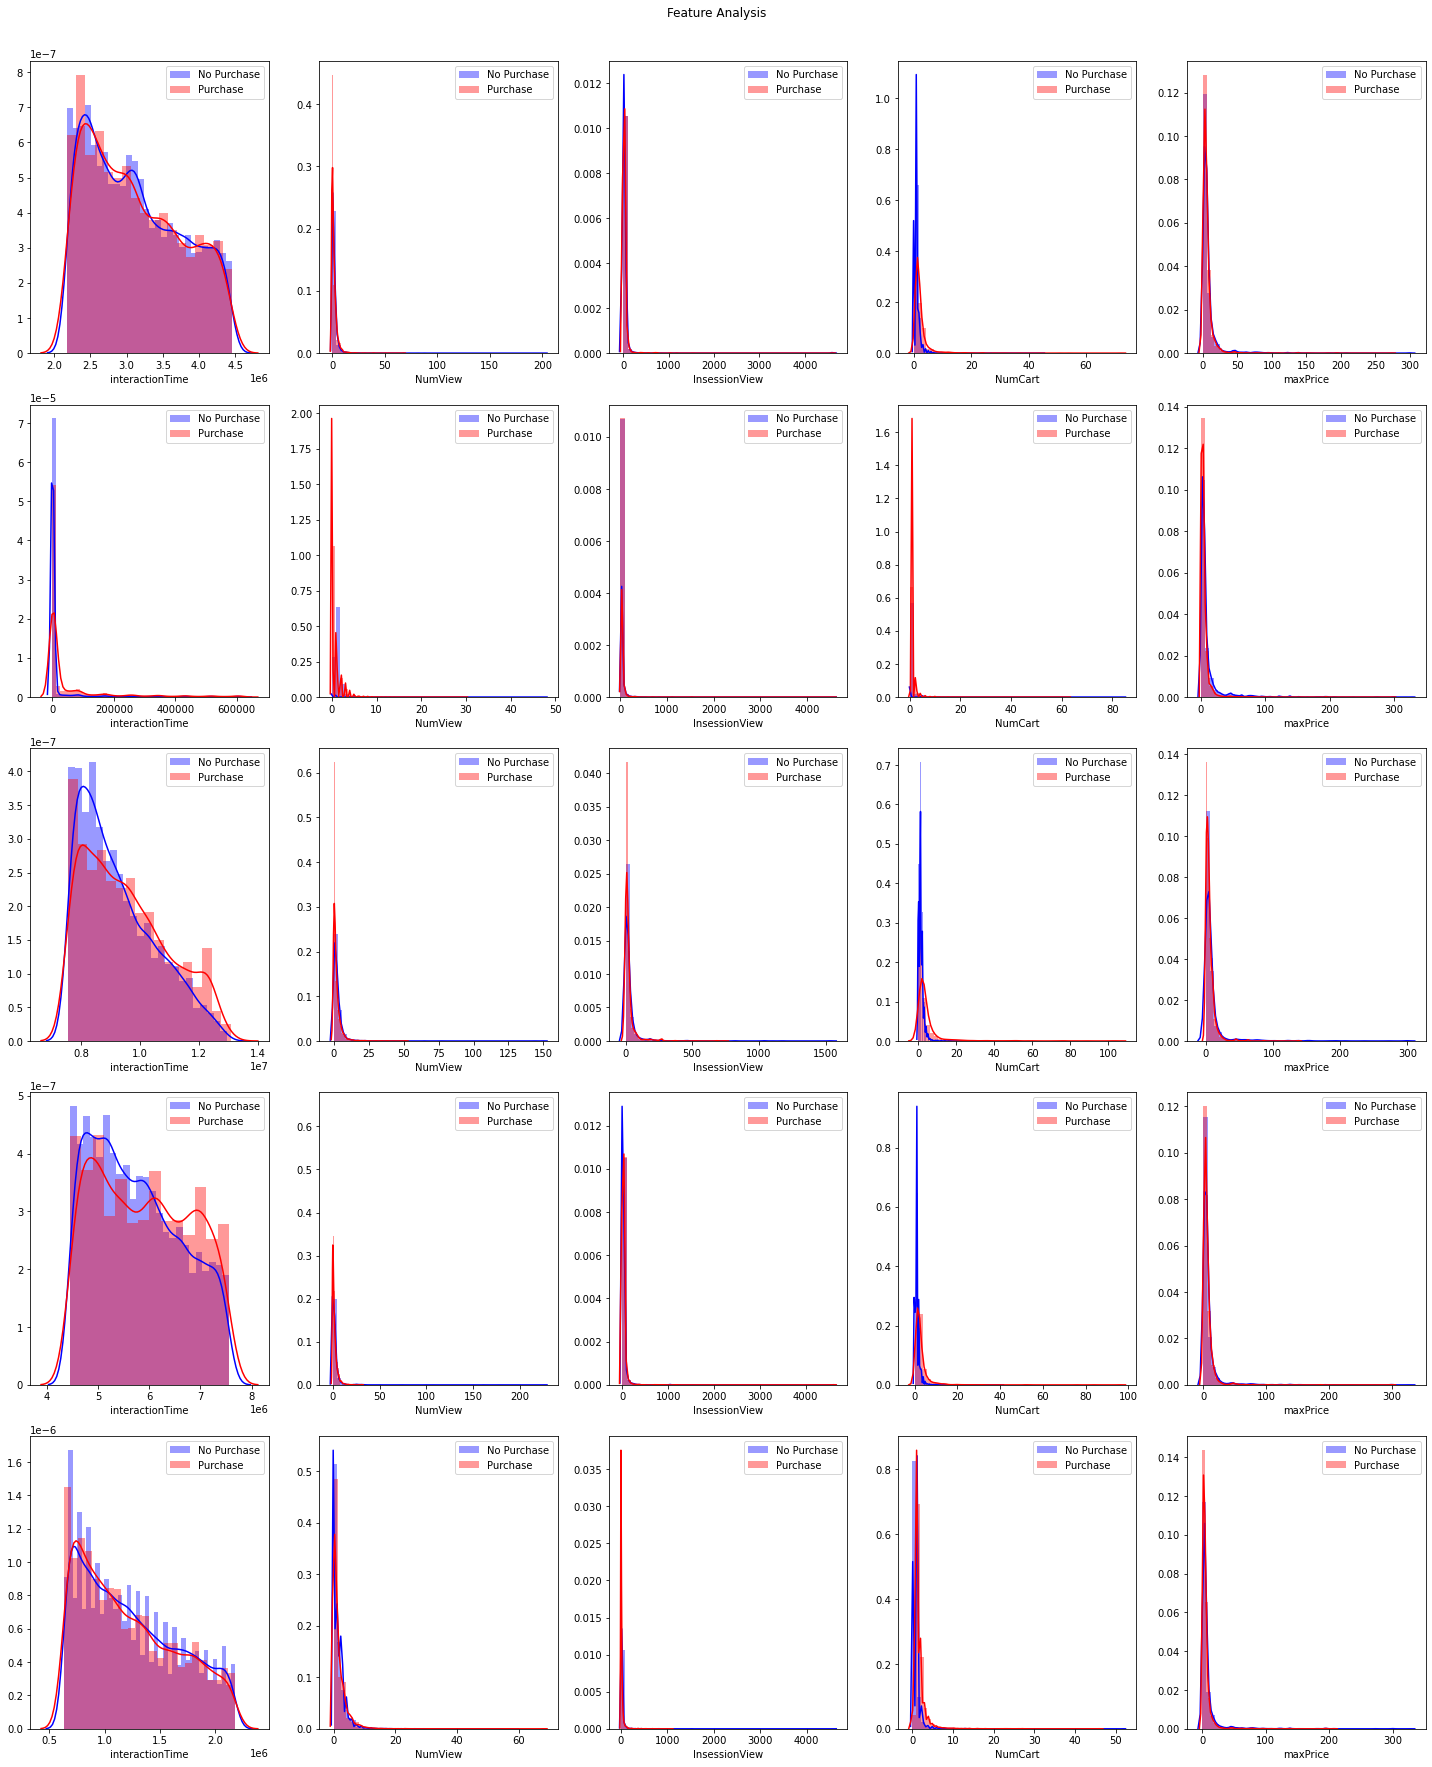

In [19]:
#plot the 5 features
fig = plt.figure(figsize = (20, 25))
j = 0
for i,c in enumerate(unique_values):
    result = df_sub.loc[df_sub['clusterID'] == c]
    cols=['interactionTime','NumView','InsessionView','NumCart','maxPrice']
    
    for i,item in enumerate(cols):
        plt.subplot(5,5, j+1)
        j += 1
        sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
        sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
        plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()